In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop all URL columns right off the bat from the dataset as this is not something we can use to predict revenue.

In [3]:
# unnecessary_columns = ['Airbnb Host URL', 'Airbnb Listing URL', 'Vrbo Listing URL', ]
# df.drop(labels=unnecessary_columns, axis=1, inplace=True)

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# #Performing label encoding
# #No becomes 0 and yes becomes 1.
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# encoder = LabelEncoder()

# # Loop over the columns in your DataFrame
# for column in df.columns:
#     # Check if the column is boolean (dtype == bool or dtype == 'bool')
#     if df[column].dtype == bool or df[column].dtype == 'bool':
#         # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
#         df[column] = encoder.fit_transform(df[column])

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,9039.000000,9039.000000,9039.000000,8539.000000,9039.000000,9.039000e+03,9.039000e+03,9018.000000,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,38.000648,-104.006820,69021.718000,25.876801,229.997455,1.373537e+05,1.757009e+05,1069.034819,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,4.162561,16.982566,31145.185266,50.080222,115.113586,1.668225e+05,2.022262e+05,1186.264521,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,27.810775,-149.135930,1029.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,34.909264,-116.380115,37863.000000,4.000000,128.000000,1.157000e+04,2.677812e+04,269.905594,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,37.940860,-111.501840,84060.000000,10.000000,256.000000,6.260000e+04,9.631200e+04,635.491108,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,40.669616,-83.599128,92253.000000,29.000000,338.000000,2.139170e+05,2.868685e+05,1478.890986,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,60.966000,-69.984322,99587.000000,500.000000,365.000000,1.547297e+06,2.045903e+06,10878.575758,1.000000,5000.000000,518.000000,10.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df[df['PRICE_TIER'].isin(['5. Luxury', '4. Upscale'])]

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155 entries, 0 to 9037
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                5155 non-null   object 
 1   TITLE                      5155 non-null   object 
 2   Property_Manager/_Host_ID  5155 non-null   object 
 3   BEDROOMS                   5151 non-null   float64
 4   ACCOMMODATES               5148 non-null   float64
 5   Airbnb_Host_URL            3309 non-null   object 
 6   Airbnb_Listing_URL         3309 non-null   object 
 7   BATHROOMS                  5153 non-null   float64
 8   CITY_NAME                  5154 non-null   object 
 9   HAS_AIRCON                 5155 non-null   bool   
 10  HAS_GYM                    5155 non-null   bool   
 11  HAS_HOTTUB                 5155 non-null   bool   
 12  HAS_KITCHEN                5155 non-null   bool   
 13  HAS_PARKING                5155 non-null   bool 

In [8]:
import numpy as np

# Calculate the 25th percentile of the 'Available_Nights' column
AN_percentile_25 = np.percentile(filtered_df['Available_Nights'], 25)
Rev_percentile_25 = np.percentile(filtered_df['Revenue'], 25)
# Filter out the rows where 'Available_Nights' is greater than or equal to the 25th percentile
filtered_df = filtered_df[filtered_df['Available_Nights'] >= AN_percentile_25]
filtered_df = filtered_df[filtered_df['Revenue'] >= 90000]
filtered_df = filtered_df[filtered_df['Occupancy'] >= .5]
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                1445 non-null   object 
 1   TITLE                      1445 non-null   object 
 2   Property_Manager/_Host_ID  1445 non-null   object 
 3   BEDROOMS                   1445 non-null   float64
 4   ACCOMMODATES               1445 non-null   float64
 5   Airbnb_Host_URL            1178 non-null   object 
 6   Airbnb_Listing_URL         1178 non-null   object 
 7   BATHROOMS                  1445 non-null   float64
 8   CITY_NAME                  1444 non-null   object 
 9   HAS_AIRCON                 1445 non-null   bool   
 10  HAS_GYM                    1445 non-null   bool   
 11  HAS_HOTTUB                 1445 non-null   bool   
 12  HAS_KITCHEN                1445 non-null   bool   
 13  HAS_PARKING                1445 non-null   bool 

In [9]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1.445000e+03,1.445000e+03,1445.000000,1445.000000,1418.000000,1445.000000,1445.000000
mean,5.856747,13.678893,5.204498,38.460370,-102.775422,66759.814533,5.323183,329.923875,3.179101e+05,3.515185e+05,1538.986246,0.686067,473.368829,64.220761,4.892782
std,2.656637,6.753629,2.681477,3.825903,17.184938,31092.402988,12.026750,42.897155,1.627275e+05,1.811222e+05,799.586457,0.120651,256.969437,57.555685,0.266331
min,1.000000,1.000000,0.000000,28.227347,-123.003134,1230.000000,0.000000,189.000000,9.016700e+04,9.068106e+04,306.033784,0.500000,0.000000,10.000000,3.500000
25%,4.000000,10.000000,3.500000,35.718552,-116.514925,37862.000000,2.000000,313.000000,1.915110e+05,2.306372e+05,1034.334802,0.588050,300.000000,24.000000,4.850000
50%,5.000000,14.000000,4.500000,38.457130,-110.765740,81620.000000,3.000000,348.000000,3.089240e+05,3.307220e+05,1403.811245,0.671186,450.000000,46.000000,4.950000
75%,7.000000,16.000000,6.000000,40.625313,-83.545092,92262.000000,5.000000,362.000000,3.757790e+05,4.109281e+05,1850.494505,0.765217,600.000000,85.000000,5.000000
max,20.000000,88.000000,22.000000,48.904585,-69.997767,98940.000000,365.000000,365.000000,1.512176e+06,1.690811e+06,7387.139785,1.000000,2600.000000,518.000000,10.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [11]:
filtered_df[filtered_df['ACCOMMODATES'] >= 40]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
194,vrbo_9488848ha,"Mountain Castle: VIEWS, Indoor Pool, Home Thea...",9488848ha,15.0,60.0,NaN,NaN,15.5,Sevierville,True,...,37862,0.0,355,538405,553274.46,2576.100478,0.588732,540.0,14.0,4.3
214,vrbo_9354721ha,Smoky Mountain Retreat: Spectacular Views! Top...,9354721ha,17.0,68.0,NaN,NaN,17.5,Sevierville,True,...,37876,0.0,358,688067,700631.19,2774.463710,0.692737,685.0,14.0,4.3
226,vrbo_9263266ha,"Ridge Top Retreat: Indoor Pool, Theater, New B...",9263266ha,12.0,56.0,NaN,NaN,13.5,Sevierville,True,...,37876,0.0,354,414668,428493.92,2278.395604,0.514124,450.0,11.0,4.4
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.9
334,vrbo_752391,"Gorgeous Lodge, Perfect for Family Reunions, P...",752391,9.0,50.0,NaN,NaN,5.5,Heber City,True,...,84032,3.0,257,276393,374142.07,1760.464968,0.623016,475.0,76.0,4.9
354,vrbo_7334379ha,"Timber Lodge: Mtn View, Large Groups, Home The...",7334379ha,16.0,52.0,NaN,NaN,18.0,Sevierville,True,...,37876,0.0,349,434489,457212.28,1905.653509,0.653295,420.0,17.0,4.7
370,vrbo_7157130ha,Zion Reunions Retreats Weddings: Sleeps 56 ppl...,7157130ha,15.0,56.0,NaN,NaN,10.5,Rockville,True,...,84763,2.0,329,541000,574352.05,2746.192893,0.598784,900.0,14.0,5.0
379,vrbo_711406,"Private Mountain Home-pool, 6 private acres ov...",711406,11.0,50.0,NaN,NaN,5.0,Heber City,True,...,84032,3.0,359,291370,299533.50,1471.565657,0.551532,595.0,91.0,4.7
474,vrbo_492302,Exclusive Use Resort and Event Space - We now...,492302,14.0,46.0,NaN,NaN,11.0,Jefferson,True,...,28640,2.0,347,731500,778181.41,3500.000000,0.602305,NaN,20.0,4.6
542,vrbo_434648,Silver Springs Lodge in the Heber Valley,434648,10.0,50.0,NaN,NaN,13.0,Heber City,True,...,84032,2.0,338,606132,654953.07,3061.272727,0.585799,845.0,34.0,4.8


In [12]:
#Minimum stay, we can probably drop this column.
filtered_df[filtered_df['MINIMUM_STAY'] >= 35]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
3889,abnb_730973495454923151,Birdie - Asheville Farmhouse with Kid Club,145533530,4.0,12.0,https://www.airbnb.com/users/show/145533530,https://www.airbnb.com/rooms/730973495454923151,3.5,Weaverville,True,...,28787,365.0,322,98048,110704.36,413.704641,0.736025,175.0,53.0,4.937736
4006,abnb_714414451885544025,The Thunderbird,414304950,3.0,6.0,https://www.airbnb.com/users/show/414304950,https://www.airbnb.com/rooms/714414451885544025,2.0,Palm Springs,True,...,92262,60.0,290,126683,146787.80,624.054187,0.700000,290.0,30.0,5.000000
4286,abnb_666240018342404681,Luxury 4BD 12+ Guest Ski-In/Out Northstar Tahoe,6808556,4.0,12.0,https://www.airbnb.com/users/show/6808556,https://www.airbnb.com/rooms/666240018342404681,4.5,Northstar Resort,True,...,96161,60.0,233,279261,351664.75,1925.937931,0.700483,550.0,13.0,5.000000
7906,abnb_27702642,"LUXURIOUS 5* ESTATE PRIME LOCATION . LTR, MTR",43498089,4.0,6.0,https://www.airbnb.com/users/show/43498089,https://www.airbnb.com/rooms/27702642,3.0,Las Vegas,True,...,89102,35.0,251,219066,337526.31,1217.033333,0.845070,499.0,57.0,4.718421


## Investigating Revenue


## Duplicates

In [13]:
filtered_df['Property_Manager/_Host_ID'].value_counts()

Vacasa                                30
Vacation Rental 365                   15
Live Breck LLC Property Management    11
Summit County Mountain Retreats       11
Railey Vacations                      11
                                      ..
414304950                              1
4321854ha                              1
Whitefish Mountain Resort Lodging      1
97765394                               1
WaterMill Cove Resort                  1
Name: Property_Manager/_Host_ID, Length: 1052, dtype: int64

In [14]:
import pandas as pd

# Assuming df is your original DataFrame

# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = filtered_df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 2].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = filtered_df[filtered_df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [15]:
duplicate_check_df

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.900000
2353,vrbo_1653852,"Comfortable Wilderness Club at Big Cedar, 2 Be...",Timesharerentalpros.com,2.0,8.0,NaN,NaN,2.0,Ridgedale,True,...,65739,0.0,269,160572,194572.91,610.539924,0.977695,199.0,13.0,4.800000
2450,vrbo_1442172,"Wilderness Club at Big Cedar, Ridgedale, 2 Bed...",Timesharerentalpros.com,2.0,8.0,NaN,NaN,2.0,Ridgedale,True,...,65739,0.0,245,149159,204025.21,616.359504,0.987755,199.0,30.0,4.800000
2456,vrbo_1437425,"Luxury on the River, Spacious Home Nestled in ...",Durango Red Cliff Properties,5.0,20.0,NaN,NaN,3.5,Durango,False,...,81301,0.0,343,166362,180226.18,919.127072,0.553517,380.0,69.0,4.800000
2497,vrbo_1326093,"7BR Luxury with Amazing Amenities, Hot Tub, Po...",Durango Red Cliff Properties,7.0,25.0,NaN,NaN,4.5,Durango,True,...,81301,0.0,361,171948,174536.09,900.251309,0.529086,485.0,55.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,abnb_13028680,Owner Managed - Bella Vista Lodge Downtown Cabin,22965698,4.0,14.0,https://www.airbnb.com/users/show/22965698,https://www.airbnb.com/rooms/13028680,4.0,Gatlinburg,True,...,37738,6.0,365,201365,201365.00,716.601423,0.769863,450.0,213.0,4.984038
8880,abnb_12992037,"Riverfront 6BD Indoor Heated Pool, Sauna & Hot...",25161357,6.0,14.0,https://www.airbnb.com/users/show/25161357,https://www.airbnb.com/rooms/12992037,6.0,South Lake Tahoe,True,...,96150,2.0,365,307571,307571.00,1276.228216,0.660274,400.0,300.0,4.757500
8901,abnb_12601125,The Landmark | L213 - Nestled at the base of Vail,Destination Residences,3.0,8.0,https://www.airbnb.com/users/show/46098517,https://www.airbnb.com/rooms/12601125,2.0,Vail,False,...,81657,1.0,312,372000,442210.12,2369.426752,0.579336,0.0,24.0,4.875000
8960,abnb_11185960,Landmark Premier Residence | L507 - Nestled at...,Destination Residences,4.0,10.0,https://www.airbnb.com/users/show/46098517,https://www.airbnb.com/rooms/11185960,4.0,Vail,True,...,81657,1.0,348,502196,546244.72,3007.161677,0.531847,0.0,22.0,5.000000


In [16]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 147


In [17]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID  TITLE                                             
33539505                   RedrockXanadu, HotTub, Patio&Deck w Panoramic View    2
dtype: int64


In [18]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 33539505
Title: RedrockXanadu, HotTub, Patio&Deck w Panoramic View
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'Airbnb_Host_URL', 'CITY_NAME', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'Vrbo_Listing_URL', 'ZIPCODE']
Differing Columns:
Property_ID : ['abnb_553687819125944286', 'abnb_553687802281376326']
BEDROOMS : [4.0, 6.0]
ACCOMMODATES : [12.0, 16.0]
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/553687819125944286', 'https://www.airbnb.com/rooms/553687802281376326']
BATHROOMS : [3.0, 5.0]
LATITUDE : [34.83396, 34.834559999999996]
LONGITUDE : [-111.78052, -111.78299999999999]
MINIMUM_STAY : [3.0, 2.0]
Available_Nights : [360, 365]
Revenue : [322405, 507318]
Revenue_Potential : [326226.32, 507318.0]
ADR : [1305.2834008097166, 1818.3440860215053]
Occupancy : [0.6861111111111111, 0.7643835616438356]
Cleaning_Fee : [375.0, 525.0]
Prop

In [19]:
#Performing label encoding
#No becomes 0 and yes becomes 1.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in filtered_df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if filtered_df[column].dtype == bool or filtered_df[column].dtype == 'bool':
        # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
        filtered_df[column] = encoder.fit_transform(filtered_df[column])

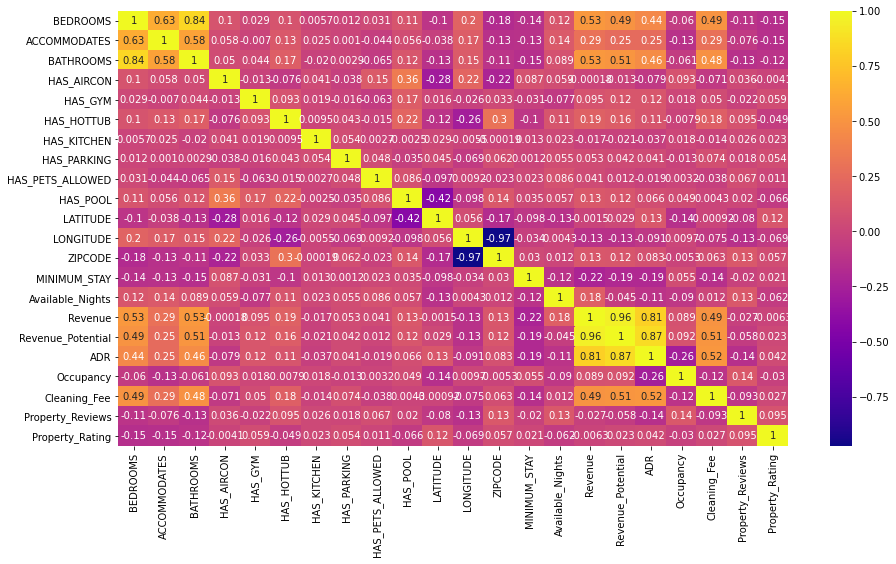

In [20]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(filtered_df.select_dtypes('number').corr(),annot=True,cmap='plasma');

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing variables including 'revenue'

# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in filtered_df.select_dtypes(include=['float64', 'int64']).columns 
                  if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if filtered_df[selected_variable].dtype == 'float64' or filtered_df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif filtered_df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…

In [22]:
# Define a threshold for the difference between 'Revenue Potential' and 'Revenue'
threshold = 100000  # Adjust the threshold as needed

# Filter the DataFrame to include only rows where 'Revenue Potential' is much greater than 'Revenue'
potential_greater_df = df[df['Revenue_Potential'] - df['Revenue'] > threshold]

# Display the resulting DataFrame
potential_greater_df


,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
67,vrbo_981923,"Ski In/Out High-End Mountain Home in Old Town,...",981923,5.0,12.0,NaN,NaN,5.5,Park City,True,...,84060,4.0,197,181118,456032.50,3622.360000,0.471698,650.0,39.0,5.000000
69,vrbo_9806415ha,Sleeps 46: Townies | Pool/Spa | Garage | Downt...,9806415ha,11.0,46.0,NaN,NaN,9.0,Moab,True,...,84532,0.0,250,200062,308904.51,1130.293785,0.716599,NaN,0.0,NaN
74,vrbo_9791198ha,"Views of the red rocks, come enjoy your privat...",9791198ha,11.0,26.0,NaN,NaN,11.0,Sedona,True,...,86351,0.0,160,414571,847380.09,3213.728682,0.806250,995.0,0.0,NaN
75,vrbo_9791193ha,Modern cabins for 45 with views of the red roc...,9791193ha,10.0,45.0,NaN,NaN,10.0,Sedona,True,...,86336,0.0,186,413193,552761.33,3228.070312,0.688172,850.0,0.0,NaN
77,vrbo_9786880ha,"Exquisite Manor by InvitedHome | Ski-in/out, H...",9786880ha,9.0,20.0,NaN,NaN,10.0,Telluride,False,...,81435,0.0,264,210725,436776.32,3398.790323,0.430556,1500.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,abnb_11571342,Heavenly Valley Condo Lake Tahoe ~ 3BR,Just Go Away Travel LLC,3.0,8.0,https://www.airbnb.com/users/show/52651623,https://www.airbnb.com/rooms/11571342,3.0,South Lake Tahoe,False,...,96150,6.0,102,73094,278557.45,1461.880000,0.793651,0.0,0.0,NaN
8954,abnb_11341765,Westin Riverfront Mountain 2B Villa,2910661,2.0,8.0,https://www.airbnb.com/users/show/2910661,https://www.airbnb.com/rooms/11341765,2.0,Avon,True,...,81620,6.0,129,154589,401568.53,1680.315217,0.741935,0.0,2.0,4.500000
8975,abnb_10536841,"Elegant, Spacious, mountainside, Hot Tub & Sauna",54333703,5.0,14.0,https://www.airbnb.com/users/show/54333703,https://www.airbnb.com/rooms/10536841,4.0,Teton Village,True,...,83025,3.0,304,342084,455392.20,2085.878049,0.583630,880.0,158.0,5.000000
8993,abnb_10277531,Luxury 4 bdr unit 1/16/22 to 1/23/22,29515026,4.0,14.0,https://www.airbnb.com/users/show/29515026,https://www.airbnb.com/rooms/10277531,4.0,Park City,True,...,84098,4.0,105,427436,603409.13,4697.098901,0.900990,250.0,0.0,NaN


In [23]:
#Might want to look at using revenue potential as the target, since this is a measure of revenue based on the house being full optimized for rental.
#Could also be inflated due to seasonal spikes, like maybe some properties only do well during ski season, then drop off after.
#So really revenue is accurate for its location.

In [24]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                1445 non-null   object 
 1   TITLE                      1445 non-null   object 
 2   Property_Manager/_Host_ID  1445 non-null   object 
 3   BEDROOMS                   1445 non-null   float64
 4   ACCOMMODATES               1445 non-null   float64
 5   Airbnb_Host_URL            1178 non-null   object 
 6   Airbnb_Listing_URL         1178 non-null   object 
 7   BATHROOMS                  1445 non-null   float64
 8   CITY_NAME                  1444 non-null   object 
 9   HAS_AIRCON                 1445 non-null   int64  
 10  HAS_GYM                    1445 non-null   int64  
 11  HAS_HOTTUB                 1445 non-null   int64  
 12  HAS_KITCHEN                1445 non-null   int64  
 13  HAS_PARKING                1445 non-null   int64

In [25]:
filtered_df.drop(labels=['Revenue_Potential', 'Airbnb_Host_URL', 'Airbnb_Listing_URL', 'Vrbo_Listing_URL', 'SUPERHOST', 
                        'INSTANT_BOOK', 'Property_ID', 'TITLE', 'Property_Manager/_Host_ID', 'BATHROOMS',
                        'CITY_NAME', 'HAS_AIRCON', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'ADR',
                        'STATE_NAME'], axis=1, inplace=True)

X= filtered_df.drop(labels=['Revenue'], axis=1)
y= filtered_df['Revenue']
X

,BEDROOMS,ACCOMMODATES,HAS_GYM,HAS_HOTTUB,HAS_KITCHEN,HAS_PARKING,HAS_PETS_ALLOWED,HAS_POOL,PRICE_TIER,MINIMUM_STAY,Available_Nights,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
0,5.0,12.0,1,1,1,1,0,1,5. Luxury,3.0,320,0.666667,500.0,50.0,4.900000
1,6.0,16.0,0,0,1,1,1,0,5. Luxury,2.0,332,1.000000,148.0,109.0,4.950000
2,6.0,12.0,0,1,1,1,1,0,5. Luxury,3.0,327,0.703364,490.0,124.0,5.000000
79,7.0,12.0,0,1,1,1,0,0,5. Luxury,5.0,309,0.552529,650.0,32.0,5.000000
80,6.0,12.0,0,1,1,0,0,0,4. Upscale,4.0,329,0.791946,365.0,66.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,5.0,14.0,0,1,1,1,0,0,4. Upscale,3.0,304,0.583630,880.0,158.0,5.000000
8983,4.0,8.0,0,1,1,1,0,1,5. Luxury,4.0,302,0.665563,300.0,163.0,4.927301
9013,7.0,16.0,0,1,1,1,0,0,5. Luxury,30.0,204,0.577778,700.0,67.0,4.917910
9026,6.0,12.0,0,0,1,1,1,0,5. Luxury,7.0,235,0.731034,300.0,43.0,4.913953


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 9035
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          1445 non-null   float64
 1   ACCOMMODATES      1445 non-null   float64
 2   HAS_GYM           1445 non-null   int64  
 3   HAS_HOTTUB        1445 non-null   int64  
 4   HAS_KITCHEN       1445 non-null   int64  
 5   HAS_PARKING       1445 non-null   int64  
 6   HAS_PETS_ALLOWED  1445 non-null   int64  
 7   HAS_POOL          1445 non-null   int64  
 8   PRICE_TIER        1445 non-null   object 
 9   MINIMUM_STAY      1445 non-null   float64
 10  Available_Nights  1445 non-null   int64  
 11  Occupancy         1445 non-null   float64
 12  Cleaning_Fee      1418 non-null   float64
 13  Property_Reviews  1445 non-null   float64
 14  Property_Rating   1445 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 180.6+ KB


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [29]:
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

In [30]:
price_tier_list = ['5. Luxury', '4. Upscale']

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore')), 
    ('onehotnorm', StandardScaler())])

In [31]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns

ct = ColumnTransformer(
    [ 
     ("nominalpipe", nominal_pipeline, ['PRICE_TIER']),
     ("numpipe", numeric_pipeline, num_cols)])

num_cols

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'MINIMUM_STAY',
       'Available_Nights', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews',
       'Property_Rating'],
      dtype='object')

In [32]:
ct

ColumnTransformer(transformers=[('nominalpipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  StandardScaler())]),
                                 ['PRICE_TIER']),
                                ('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer()),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'MINIMUM_STAY',
       'Available_Nights', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews',
       'Property_Rating'],
      dtype='object'))])

In [33]:
from sklearn.linear_model import LinearRegression
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LinearRegression())])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['PRICE_TIER']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'MINIMUM_STAY',
       'Available_Nights', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews',
       'Property_Rating'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [34]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['PRICE_TIER']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'MINIMUM_STAY',
       'Available_Nights', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews',
       'Property_Rating'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [35]:
y_pred = final_pipe.predict(X_test)

Root Mean Squared Error (RMSE): 142938.7338974583
Mean Absolute Error (MAE): 94014.03947338043
R-squared (R^2): 0.44893356732129086


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


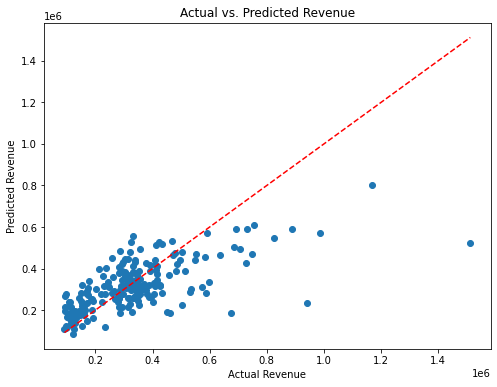

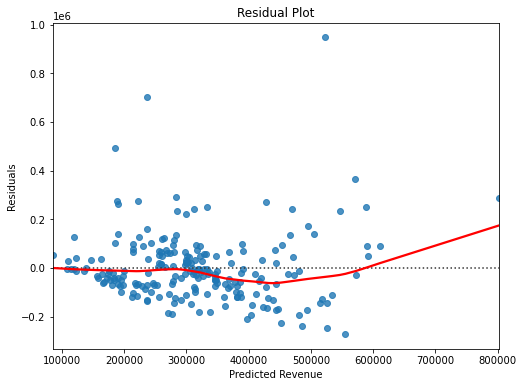

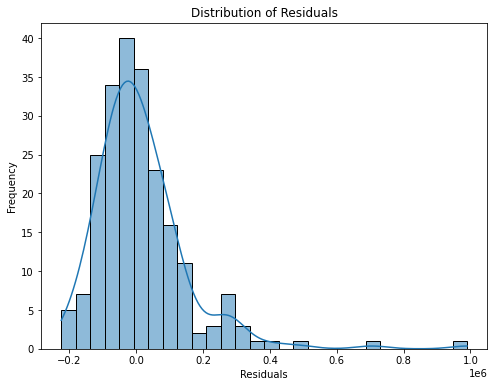

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()
